# Theorist Tutorial

[Theorists](../theorist/index.md) are classes designed to automate the construction of interpretable models from data. AutoRA theorists are implemented as sklearn regressors and can be used with the `fit` and `predict` methods.

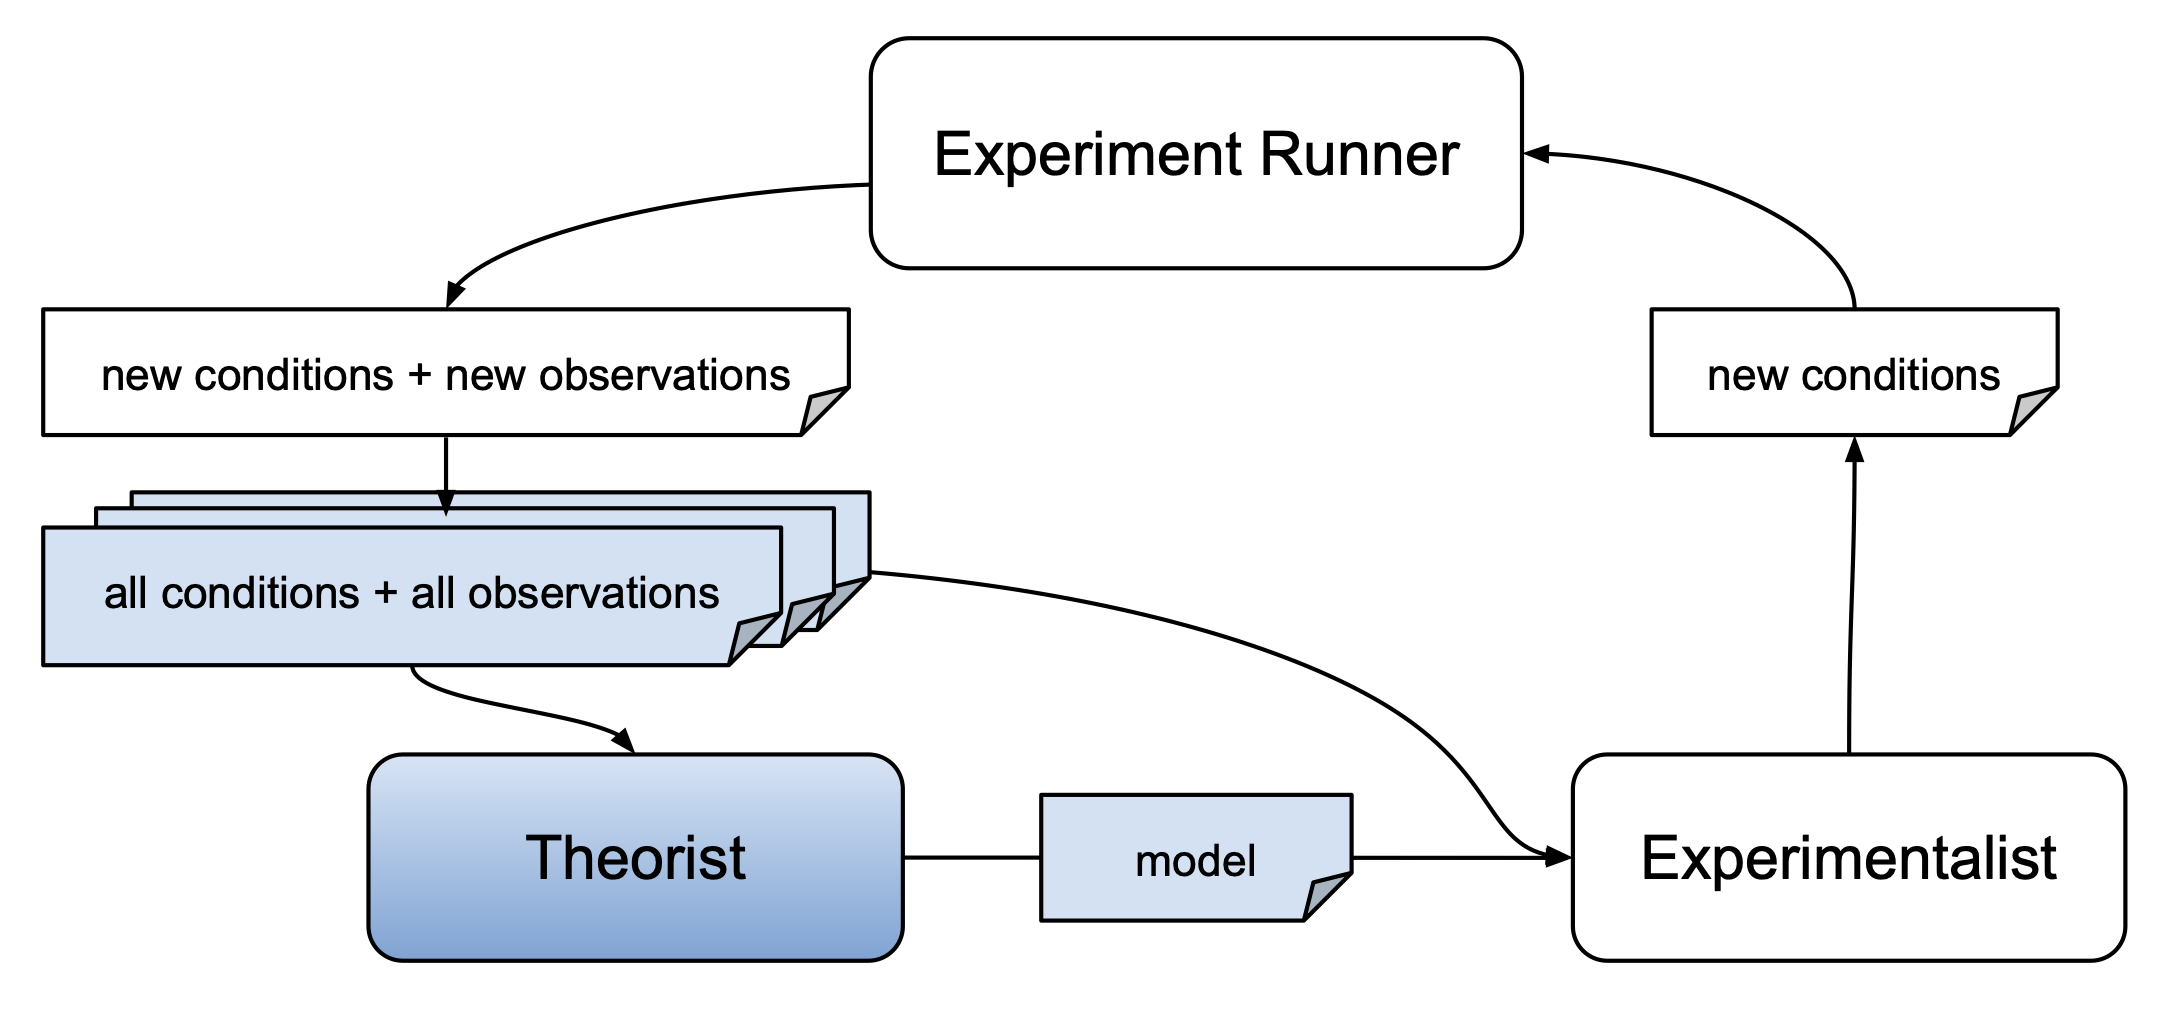

In order to use a theorist, you must first install the corresponding theorist package. Some theorists are installed by default when you install ``autora``. Once a theorist is installed, you can instantiate it and use it as you would any other sklearn regressor. That is, you can call the ``fit`` function of the theorist by passing in experimental conditions and corresponding observations, and then call the ``predict`` function to generate predicted observations for novel experimental conditions using the discovered model.

The following tutorial demonstrates how to use the `BMSRegressor` (Guimerà et al., 2020, in Sci. Adv.)–a theorist that can discover an interpretable equation relating the independent variables of an experiment (experiment conditions) to predicted dependent variables (observations).

In [ ]:
# Uncomment the following line when running on Google Colab
# !pip install "autora[theorist-bms]"

After importing the necessary modules,

In [ ]:
from autora.theorist.bms import BMSRegressor
import numpy as np
import matplotlib.pyplot as plt

we begin by generating data with a ground-truth equation, $y = \sin(x) + x^3$.

In [ ]:
x = np.expand_dims(np.linspace(start=-1, stop=1, num=500), 1)
y = np.power(x, 3) + np.sin(x)

Then we set up the BMS regressor with our chosen meta parameters. In this case, we will specify the number of `epochs` as well as temperatures (`ts`). Note, BMS also allows users to specify unique priors over the operations considered in the search space (`prior_par`), but in this simple example we will stick with those priors implemented by the original authors, Guimerà et al. (2020).


In [ ]:
temperatures = [1.0] + [1.04**k for k in range(1, 20)]

bms_estimator = BMSRegressor(
    epochs=500,
    ts=temperatures,
)

With our regressor initialized, we can call the `fit` method to discover an equation for our data and then use the `predict` method to generate predictions using our discovered equation.

In [ ]:
bms_estimator.fit(x,y)
y_pred = bms_estimator.predict(x)

INFO:autora.theorist.bms.regressor:BMS fitting started
100%|██████████| 500/500 [04:47<00:00,  1.74it/s]
INFO:autora.theorist.bms.regressor:BMS fitting finished


Finally, we can plot the results.

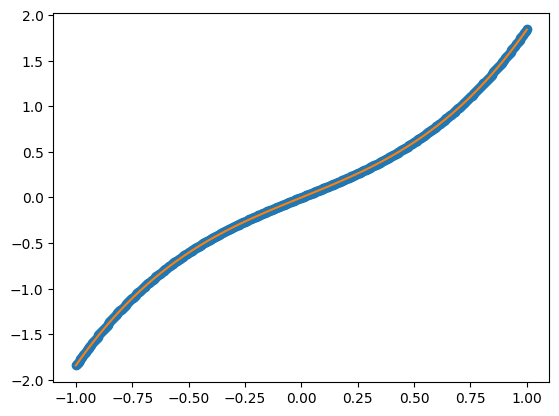

In [ ]:
# plot out the ground truth versus predicted responses
plt.figure()
plt.plot(x, y, "o")
plt.plot(x, y_pred, "-")
plt.show()

In this simple case, the algorithm finds an equation with a perfect fit.
